In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("car_resale_prices.csv")

In [4]:
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


## Data Cleaning

In [6]:
# removing the 1st column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.sample()

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
406,2011 Maruti Swift VDI,₹ 2.85 Lakh,2011,1248 cc,Third Party insurance,Manual,"90,000 Kms",Fourth Owner,Diesel,74bhp,5.0,22.9 kmpl,Hatchback,Lucknow


In [8]:
# Converting Price in lakhs

def price_in_lakh(x):
    items = x.split()
    if len(items) == 2:
        return np.float32(items[1].replace(",", ""))/100000
    elif items[2] == "Crore":
        return (np.float32(items[1])*10000000)/100000
    else:
        return np.float32(items[1])

df['resale_price'] = df['resale_price'].apply(price_in_lakh)

In [9]:
df.sample()

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
9119,2015 Hyundai EON Magna Plus,3.7,Jul 2015,814 cc,Third Party insurance,Manual,"37,671 Kms",First Owner,Petrol,55.2bhp,5.0,21.1 kmpl,Hatchback,Hyderabad


In [10]:
# Extracting year from full name
df['registered_year'] = df['full_name'].apply(lambda x: x.split()[0])

In [11]:
# Null values
df.isnull().sum()

full_name              0
resale_price           0
registered_year        0
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
# Removing the CC from the engine capacity
df['engine_capacity'] = df['engine_capacity'].apply(lambda x: int(x.split()[0]))

In [14]:
df['insurance'].value_counts()

insurance
Third Party insurance    7245
Comprehensive            6178
Third Party              1930
Zero Dep                  819
Not Available             628
1                           5
2                           3
Name: count, dtype: int64

In [15]:
# Encoding the values
def insurance_convert(x):
    if x == "Third Party insurance":
        return "Third Party"
    elif x == "1":
        return "First"
    elif x == "2":
        return "Second"
    else:
        return x

    
df['insurance'] = df['insurance'].apply(insurance_convert)

In [16]:
df['transmission_type'].value_counts()

transmission_type
Manual       12211
Automatic     4597
Name: count, dtype: int64

In [17]:
df['kms_driven'] = df['kms_driven'].apply(lambda x: int(x.split()[0].replace(",", "")))

In [18]:
df['owner_type'].value_counts()

owner_type
First Owner     11814
Second Owner     4070
Third Owner       751
Fourth Owner      125
Fifth Owner        48
Name: count, dtype: int64

In [19]:
df.sample()

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
7724,2017 Renault Pulse RxL Optional,2.5,2017,1461,Third Party,Manual,90000,Second Owner,Diesel,63.1bhp,5.0,23.08 kmpl,Hatchback,Hyderabad


In [20]:
# 1ps = 0.986bhp

def ps_to_bhp(x):
    x = x.lower()
    power = x.split()
    if len(power) == 1:
        if "bhp" == x[-3:]:
            return float(x[:-3])
        elif "ps" == x[-2:]:
            return float(x[:-2])*0.986
        elif "(" in x:
            return float(x[:x.find("(")])
        elif "/" in x:
            return float(x[:3])
        else:
            return float(x[:2])
    else:
        if power[0].endswith('ps'):
            return float(power[0][:-2])*0.986
        elif power[0].endswith('bhp'):
            return float(power[0][:-3])
        elif "(" in x:
            return float(x[:x.find("(")])
        else:
            return float(power[0])*0.986
    
df['max_power'] = df['max_power'].apply(ps_to_bhp)

In [21]:
df['mileage'] = df['mileage'].apply(lambda x: float(x.split()[0]))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          16808 non-null  object 
 1   resale_price       16808 non-null  float64
 2   registered_year    16808 non-null  object 
 3   engine_capacity    16808 non-null  int64  
 4   insurance          16808 non-null  object 
 5   transmission_type  16808 non-null  object 
 6   kms_driven         16808 non-null  int64  
 7   owner_type         16808 non-null  object 
 8   fuel_type          16808 non-null  object 
 9   max_power          16808 non-null  float64
 10  seats              16808 non-null  float64
 11  mileage            16808 non-null  float64
 12  body_type          16808 non-null  object 
 13  city               16808 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.9+ MB


In [23]:
df.duplicated().sum()

203

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.drop(['full_name', 'city'], axis=1, inplace= True)

In [26]:
df['registered_year'] = pd.to_datetime(df['registered_year']).dt.year

In [27]:
X = df.drop(['resale_price'], axis=1)
y = df['resale_price']

## EDA

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
num_x = X.select_dtypes(include=['float', 'int'])
num_x

,registered_year,engine_capacity,kms_driven,max_power,seats,mileage
0,2017,1197,40000,83.10,5.0,21.40
1,2018,2179,70000,153.86,7.0,17.60
2,2015,1197,70000,83.14,5.0,20.85
4,2009,1086,80000,68.05,5.0,19.81
5,2015,1197,70000,81.86,5.0,17.19
...,...,...,...,...,...,...
17441,2013,1198,89000,86.70,5.0,18.00
17442,2016,2494,68000,157.70,5.0,19.16
17443,2016,1798,81000,138.03,5.0,14.28
17444,2019,1582,20000,126.20,5.0,17.01


In [30]:
plt.style.use('ggplot')

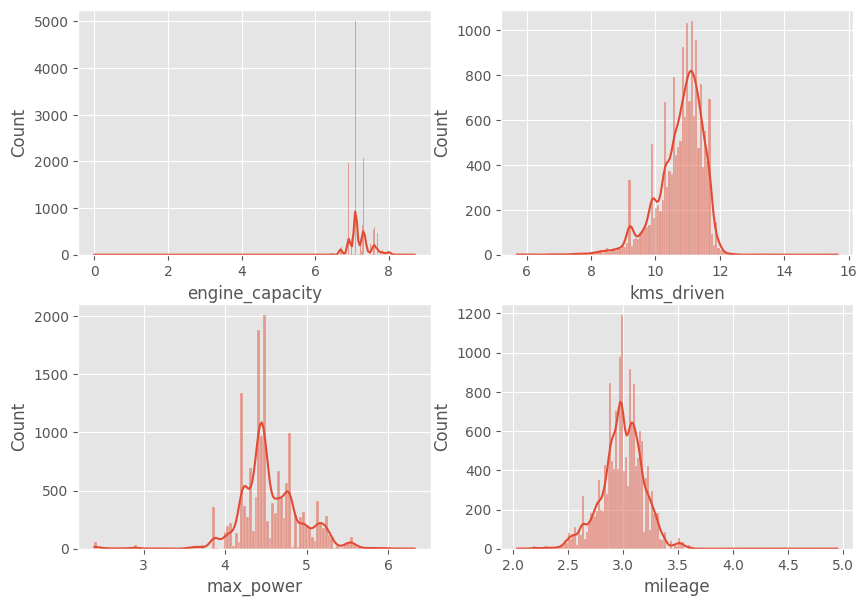

In [31]:
# plotting in log scale for better visualization
# Distribution of the numerical data

plt.figure(figsize=(10,7))
plt.tight_layout()
for i in range(num_x.shape[1]-2):
    plt.subplot(2,2,i+1)
    sns.histplot(num_x.drop(['seats', 'registered_year'], axis=1).iloc[:, i].apply(np.log1p), kde=True)

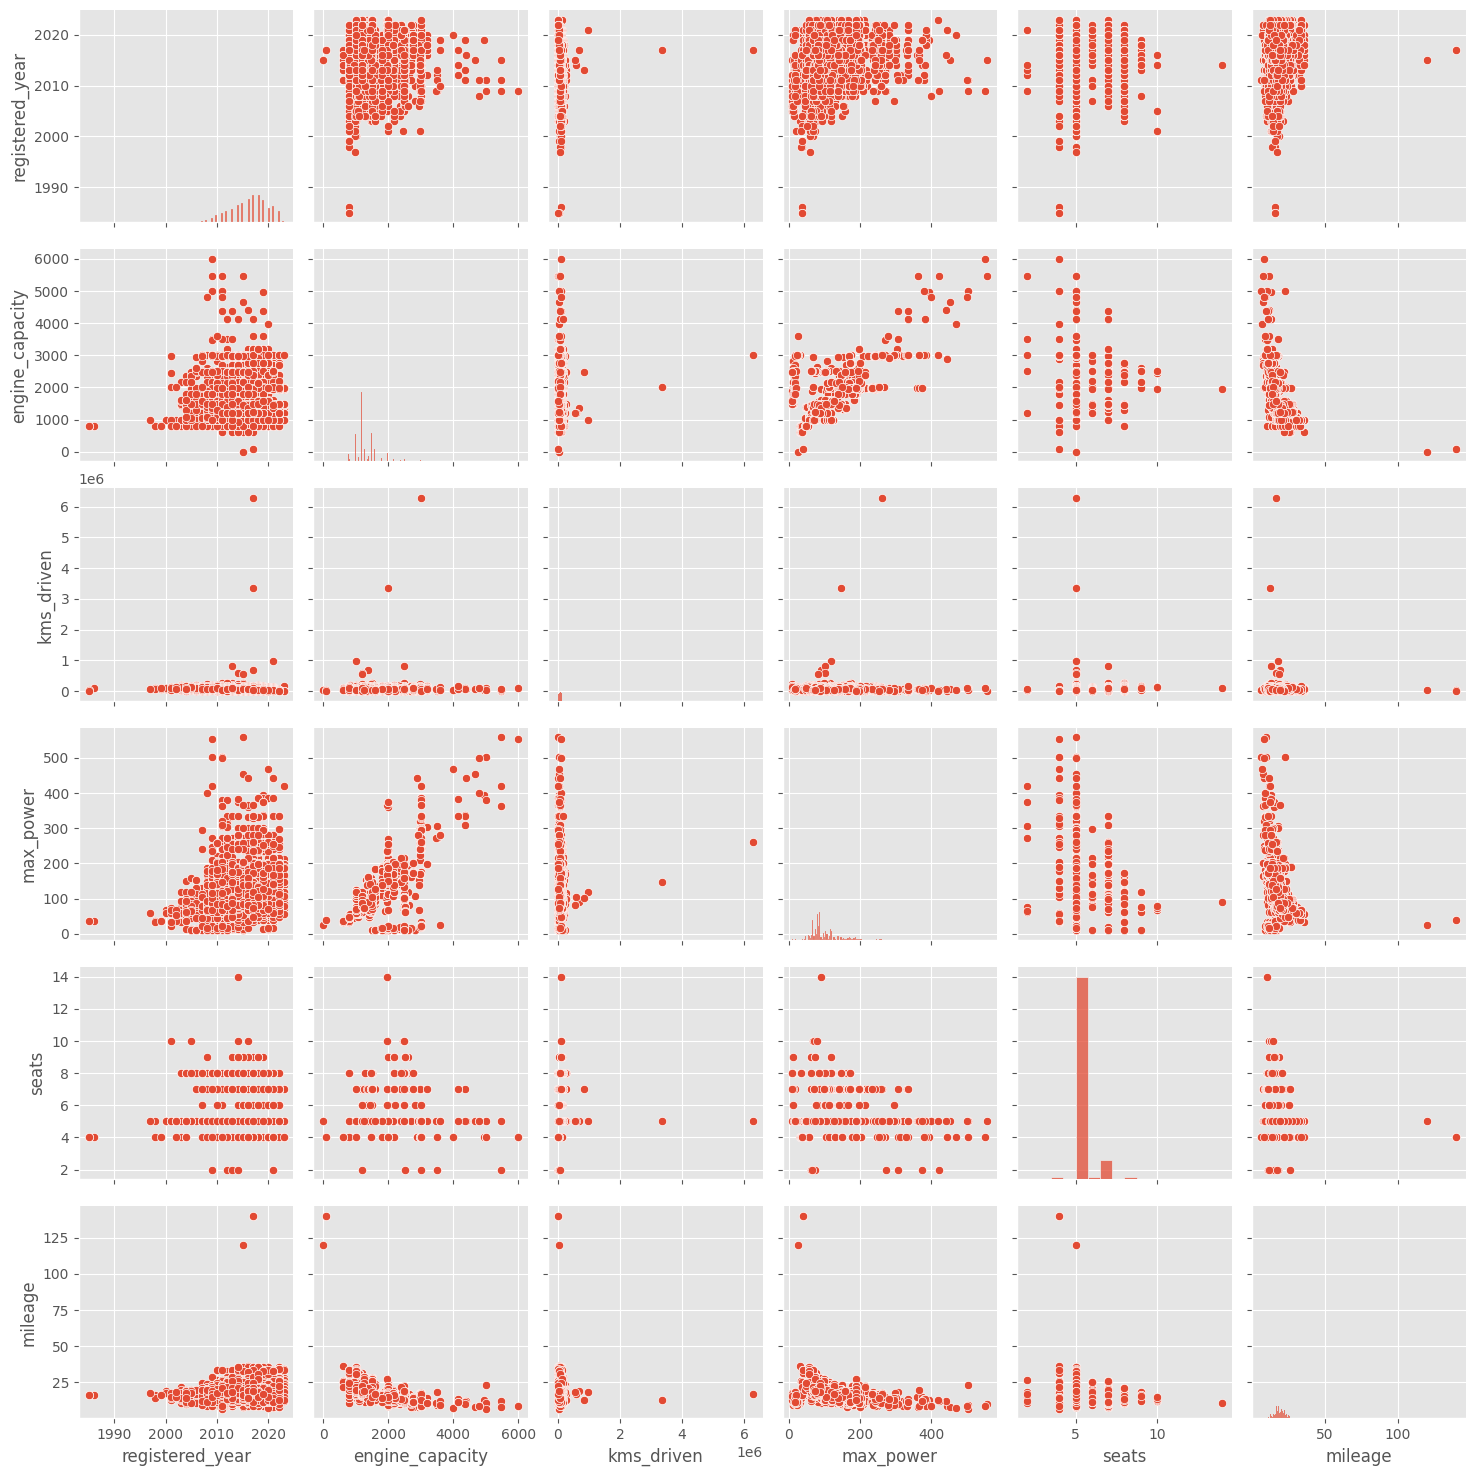

In [32]:
# Relationship between numerical attributes
sns.pairplot(num_x)

Text(0, 0.5, 'Resale price')

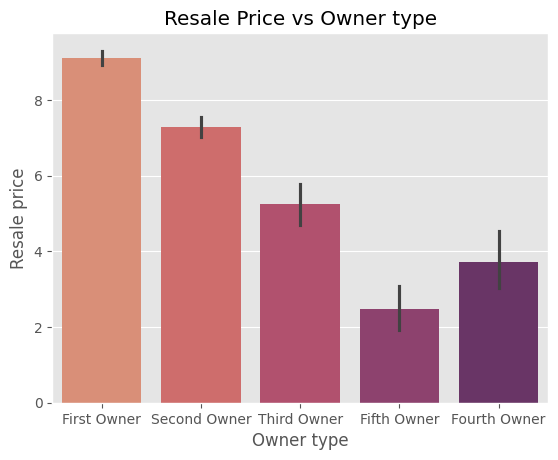

In [33]:
# Impact of owner type on resale price
sns.barplot(data=df, x='owner_type', y='resale_price', palette='flare')
plt.title("Resale Price vs Owner type")
plt.xlabel("Owner type")
plt.ylabel("Resale price")

Text(0, 0.5, 'Insurance')

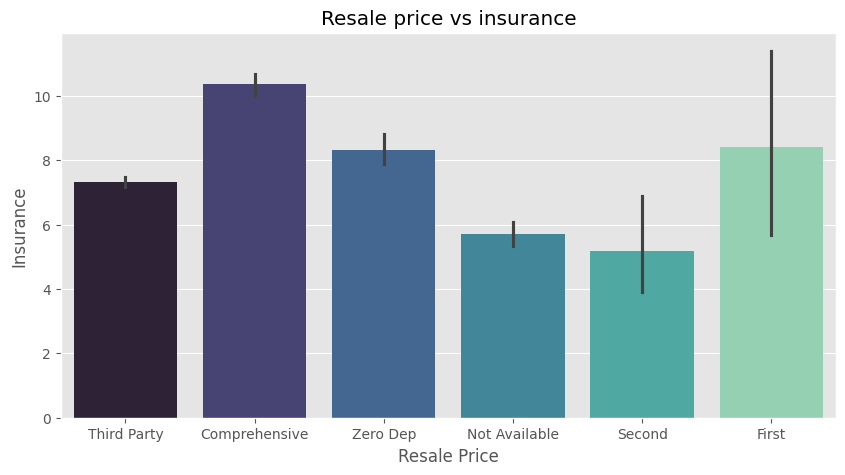

In [34]:
# Impact of insurance on resale price
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='insurance', y='resale_price', palette='mako')
plt.title("Resale price vs insurance")
plt.xlabel("Resale Price")
plt.ylabel("Insurance")

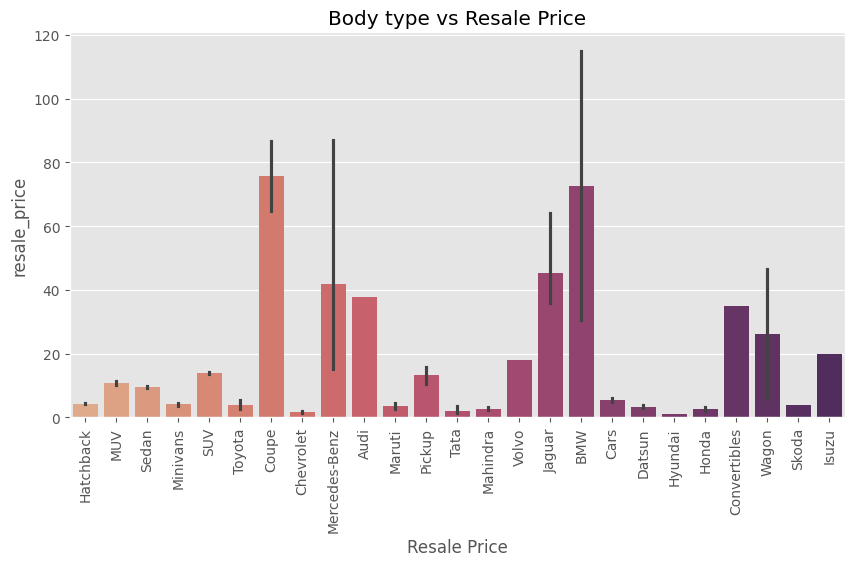

In [35]:
# Impact of body type on resale price
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='body_type', y='resale_price', palette='flare')
plt.xticks(rotation=90)
plt.title("Body type vs Resale Price")
plt.xlabel("Body type")
plt.xlabel("Resale Price")
plt.show()

In [36]:
# Top 5 cars with highest average resale price
top_5 = df.groupby(['body_type'])['resale_price'].mean().sort_values(ascending=False).head()
pd.DataFrame(top_5)

,resale_price
body_type,
Coupe,75.662500
BMW,72.749999
Jaguar,45.333333
Mercedes-Benz,41.991666
Audi,37.750000


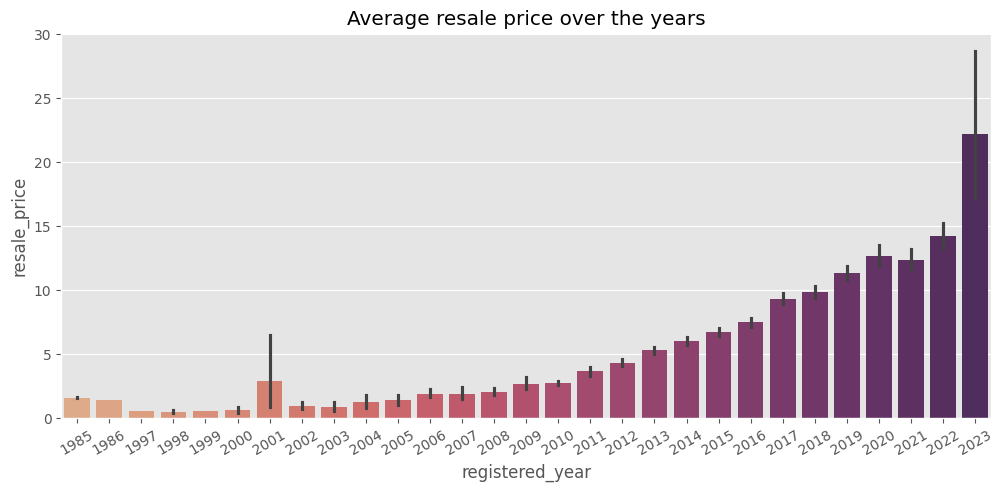

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['registered_year'], y=df['resale_price'], palette='flare')
plt.title("Average resale price over the years")
plt.xticks(rotation=30)
plt.show()

Newer cars tend to have high resale price

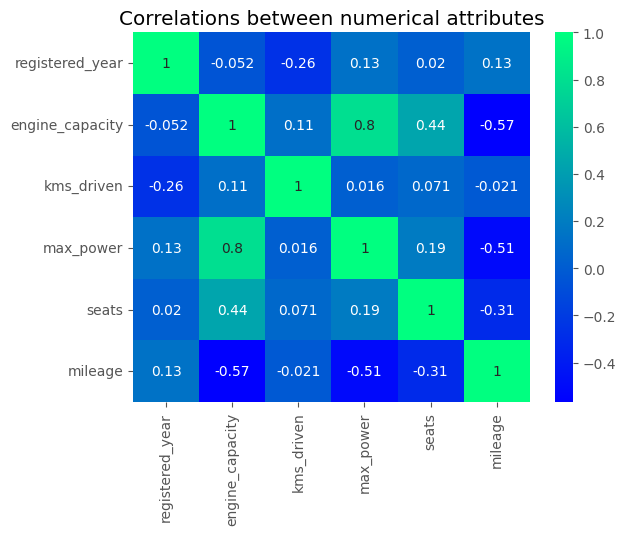

In [38]:
sns.heatmap(num_x.corr(), annot=True, cmap='winter')
plt.title("Correlations between numerical attributes")
plt.show()

- `engine capacity` and `mileage` is negetively correlated
- `engine capacity` and `maxpower` is positively correlated

## Model Development

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [40]:
X.sample()

,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type
12568,2009,2494,Third Party,Manual,120000,Second Owner,Diesel,10.0,8.0,12.8,MUV


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(['body_type'], axis=1), y, random_state=61, test_size=0.2)

In [42]:
X_train.shape

(13284, 10)

In [43]:
X_test.shape

(3321, 10)

In [44]:
trf = ColumnTransformer([('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), [2,3,5,6])],
                        remainder='passthrough')
pipe = Pipeline([('trf', trf), ('scale', StandardScaler())])

In [45]:
pipe.fit(X_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [2, 3, 5, 6])])),
                ('scale', StandardScaler())])

In [46]:
X_train_t = pipe.transform(X_train)
X_test_t = pipe.transform(X_test)

In [47]:
pipe.get_feature_names_out()

array(['ohe__insurance_First', 'ohe__insurance_Not Available',
       'ohe__insurance_Second', 'ohe__insurance_Third Party',
       'ohe__insurance_Zero Dep', 'ohe__transmission_type_Manual',
       'ohe__owner_type_First Owner', 'ohe__owner_type_Fourth Owner',
       'ohe__owner_type_Second Owner', 'ohe__owner_type_Third Owner',
       'ohe__fuel_type_Diesel', 'ohe__fuel_type_Electric',
       'ohe__fuel_type_LPG', 'ohe__fuel_type_Petrol',
       'remainder__registered_year', 'remainder__engine_capacity',
       'remainder__kms_driven', 'remainder__max_power',
       'remainder__seats', 'remainder__mileage'], dtype=object)

In [48]:
X_train_t.shape

(13284, 20)

In [49]:
models = [
    SVR(),
    GradientBoostingRegressor(learning_rate=0.01),
    AdaBoostRegressor(loss='square',learning_rate=0.1),
    RandomForestRegressor(max_depth=7),
    KNeighborsRegressor()
]

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
for i, model in enumerate(models):
    model.fit(X_train_t, y_train)
    y_pred = model.predict(X_test_t)
    model_name = (model.__class__.__name__).ljust(30)
    print(f"{model_name}: = MSE : {mean_squared_error(y_test, y_pred):.4f} MAE : {mean_absolute_error(y_test, y_pred):.4f}")

SVR                           : = MSE : 27.1262 MAE : 1.8318
GradientBoostingRegressor     : = MSE : 33.9695 MAE : 2.9076
AdaBoostRegressor             : = MSE : 24.7015 MAE : 2.7095
RandomForestRegressor         : = MSE : 13.6630 MAE : 1.5785
KNeighborsRegressor           : = MSE : 17.4252 MAE : 1.6390


In [52]:
from sklearn.metrics import PredictionErrorDisplay

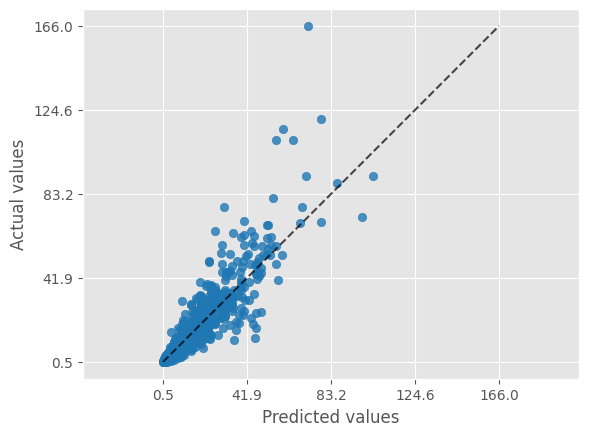

In [53]:
y_pred = models[4].predict(X_test_t)
disp = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
disp.plot(kind="actual_vs_predicted")

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters = {'max_depth': [3, 5, 7, 9], 'n_estimators': [100, 200, 500]}
rf = RandomForestRegressor(n_jobs=-1)
grid = GridSearchCV(rf, parameters)
grid.fit(X_train_t, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 500]})

In [56]:
grid.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [57]:
rf = RandomForestRegressor(max_depth=9, n_estimators=500, n_jobs=-1)
rf.fit(X_train_t, y_train)

RandomForestRegressor(max_depth=9, n_estimators=500, n_jobs=-1)

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
cvs = cross_val_score(rf, X_test_t, y_test, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

In [60]:
cvs.mean()

-1.4879267502597444

In [61]:
fmodel = Pipeline([('trf', trf), ('scale', StandardScaler()), ('model', RandomForestRegressor(max_depth= 9, n_estimators= 500))])

In [62]:
fmodel.fit(X_train, y_train)

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [2, 3, 5, 6])])),
                ('scale', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=9, n_estimators=500))])

In [63]:
import pickle

In [64]:
pickle.dump(fmodel, open('model.pkl', 'wb'))